In [3]:
import vnquant.data as dt
from vnquant import plot as pl

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import os
import sys
sys.path.append('./Arimax')

from arima.utils import*

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

from tqdm import tqdm

2023-11-30 11:56:30,064 : WARNING : From e:\Program Files\Python310\lib\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



In [4]:
stock= SelectedStock("VCB", "2020-01-01", "2023-01-01")
stock.data = stock.data.droplevel(level='Symbols', axis=1)

2023-11-30 11:56:50,265 : INFO : data VCB from 2020-01-01 to 2023-01-01 have already cloned!


2023-11-30 11:56:53,613 : WARNING : From e:\Program Files\Python310\lib\site-packages\keras\src\backend.py:873: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

2023-11-30 11:56:54,558 : WARNING : From e:\Program Files\Python310\lib\site-packages\keras\src\optimizers\__init__.py:309: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Epoch 1/50


2023-11-30 11:56:55,662 : WARNING : From e:\Program Files\Python310\lib\site-packages\keras\src\utils\tf_utils.py:492: The name tf.ragged.RaggedTensorValue is deprecated. Please use tf.compat.v1.ragged.RaggedTensorValue instead.



27/27 [==============================] - 5s 10ms/step - loss: nan
Epoch 2/50
27/27 [==============================] - 0s 11ms/step - loss: nan
Epoch 3/50
27/27 [==============================] - 0s 8ms/step - loss: nan
Epoch 4/50
27/27 [==============================] - 0s 8ms/step - loss: nan
Epoch 5/50
27/27 [==============================] - 0s 9ms/step - loss: nan
Epoch 6/50
27/27 [==============================] - 0s 9ms/step - loss: nan
Epoch 7/50
27/27 [==============================] - 0s 10ms/step - loss: nan
Epoch 8/50
27/27 [==============================] - 0s 8ms/step - loss: nan
Epoch 9/50
27/27 [==============================] - 0s 8ms/step - loss: nan
Epoch 10/50
27/27 [==============================] - 0s 8ms/step - loss: nan
Epoch 11/50
27/27 [==============================] - 0s 10ms/step - loss: nan
Epoch 12/50
27/27 [==============================] - 0s 8ms/step - loss: nan
Epoch 13/50
27/27 [==============================] - 0s 8ms/step - loss: nan
Epoch 14/50
27/

KeyError: 'date'

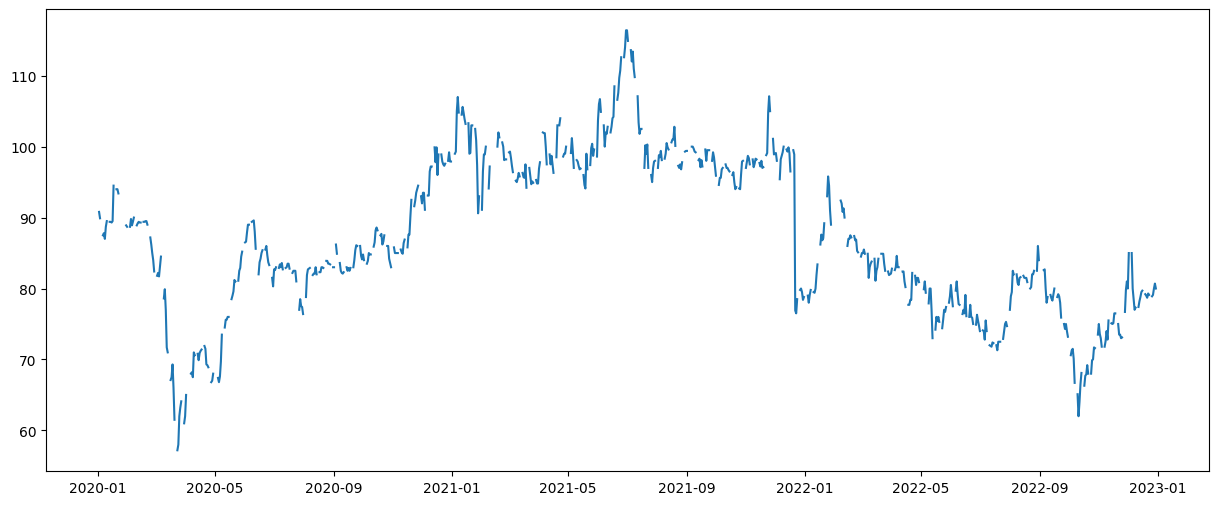

In [5]:
df = stock.data

# Chuẩn bị dữ liệu
data = df['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Chia dữ liệu thành bộ dữ liệu huấn luyện và kiểm tra
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Chuyển dữ liệu thành dãy thời gian và dãy kết quả
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

time_steps = 10
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape dữ liệu để phù hợp với đầu vào của LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Dự đoán giá cổ phiếu trên tập kiểm tra
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Chuyển kết quả dự đoán thành DataFrame để so sánh với giá thực tế
df_result = df.iloc[train_size + time_steps + 1: len(df)-1, :].copy()
df_result['predicted_price'] = predictions[:-1]

# Trực quan hóa kết quả
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['close'], label='Actual Stock Price')
plt.plot(df_result['date'], df_result['predicted_price'], label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Ví dụ với dữ liệu giả định
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='B')
df = pd.DataFrame(date_rng, columns=['date'])
df['stock_price'] = np.random.uniform(50, 150, size=(len(date_rng),))
df['volume'] = np.random.uniform(10000, 50000, size=(len(date_rng),))
df['feature_1'] = np.random.uniform(0, 1, size=(len(date_rng),))
df['feature_2'] = np.random.uniform(0, 1, size=(len(date_rng),))

# Chuẩn bị dữ liệu
data = df[['stock_price', 'volume', 'feature_1', 'feature_2']].values

# Chia thành biến độc lập và biến phụ thuộc
X = data[:, 1:]  # Biến độc lập là volume, feature_1, feature_2
y = data[:, 0]   # Biến phụ thuộc là stock_price

# Chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sử dụng RFE với mô hình Linear Regression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=2)  # Chọn 2 biến
fit = rfe.fit(X_train, y_train)

# In thông tin về biến được chọn
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

# Dự đoán giá cổ phiếu trên tập kiểm tra với các biến được chọn
y_pred = fit.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Num Features:  2
Selected Features:  [False  True  True]
Feature Ranking:  [2 1 1]
Mean Squared Error: 900.8722972484759
